In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

def Poissonmatrix(_N):
    return - np.diag(np.ones(_N-1),-1) + 2*np.diag(np.ones(_N),0) - np.diag(np.ones(_N-1),1)

def Poissonmatrix4thorder(_N):
    # Get the basic discretization for the interior nodes
    _Z = 30 * np.diag(np.ones(_N),0)
    _Z += - 16 * np.diag(np.ones(_N-1),1)
    _Z += - 16 * np.diag(np.ones(_N-1),-1)
    _Z += 1 * np.diag(np.ones(_N-2),2)
    _Z += 1 * np.diag(np.ones(_N-2),-2)
    _Z = (1/12)*(_N+1)*(_N+1)*_Z
    
    # Fix discretization at the nodes close to the boundary
    _Z[0,:] = (_N+1)*(_N+1)*np.hstack([[2, -1], np.zeros(_N-2)])
    _Z[_Z.shape[0]-1,:] = (_N+1)*(_N+1)*np.hstack([np.zeros(_N-2), [-1, 2]])
    return _Z

def ApplyDirichlet(_b,v0,v1,_N):
    _b[0] += _N*_N*v0
    _b[_b.size - 1] += _N*_N*v1
    return _b


def ApplyDirichlet4thorder(_b,v0,v1,_N):
    _b[0] += _N*_N*v0
    _b[1] -= (1/12)*_N*_N*v0
    _b[_b.size-2] -= (1/12)*_N*_N*v1
    _b[_b.size-1] += _N*_N*v1
    
def MassMatrix(_N):
    _M = np.diag(np.ones(_N))
    _M += 0.5 * np.diag(np.ones(_N-1),1)
    _M += 0.5 * np.diag(np.ones(_N-1),-1)
    _M = 1/3 * 1/(_N-1) * _M
    return _M

Text(0, 0.5, 'u(x)')

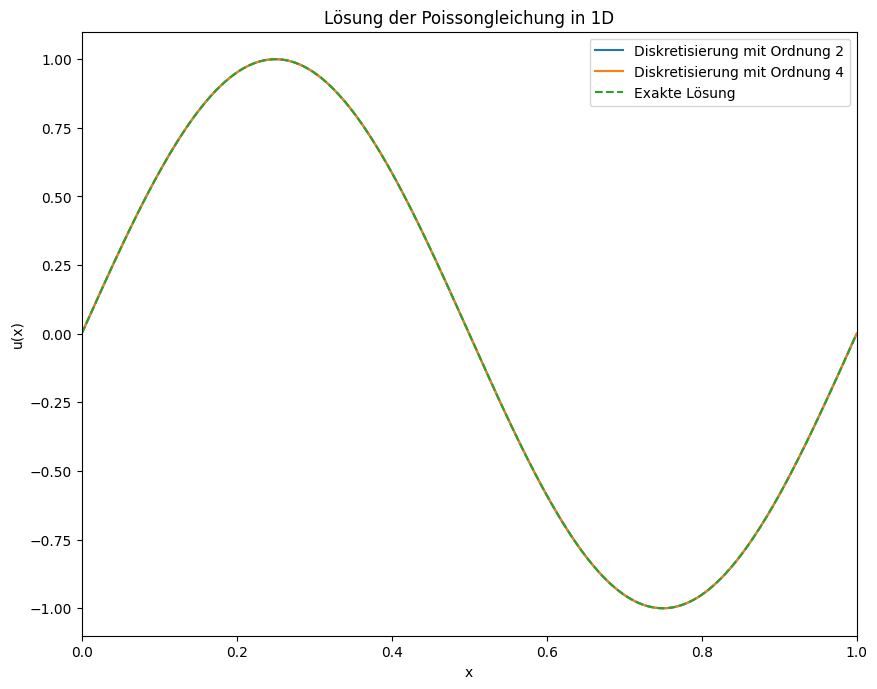

In [2]:
N = 200
bc0 = 0
bc1 = 0

Z = N*N*Poissonmatrix(N-1)
Z2 = Poissonmatrix4thorder(N-1)
b = -100*np.ones(N-1)
b = 4*pi*pi*np.sin(2*pi*np.arange(1/N,1,1/N))
#b = 30*np.ones(N-1)
#b[N//2:] = -30
b2 = np.copy(b)

ApplyDirichlet(b,bc0,bc1,N)
ApplyDirichlet4thorder(b2,bc0,bc1,N)

c = np.linalg.solve(Z,b)
c2 = np.linalg.solve(Z2,b2)
clong = np.hstack([bc0, c, bc1])
clong2 = np.hstack([bc0, c2, bc1])

fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(np.arange(0,1+1/N,1/N),clong)
plt.plot(np.arange(0,1+1/N,1/N),clong2)
plt.plot(np.arange(0,1,1e-3),np.sin(2*pi*np.arange(0,1,1e-3)),'--')
plt.legend(["Diskretisierung mit Ordnung 2", "Diskretisierung mit Ordnung 4", "Exakte Lösung"])
plt.title("Lösung der Poissongleichung in 1D")
plt.xlim([0, 1])
plt.xlabel("x")
plt.ylabel("u(x)")


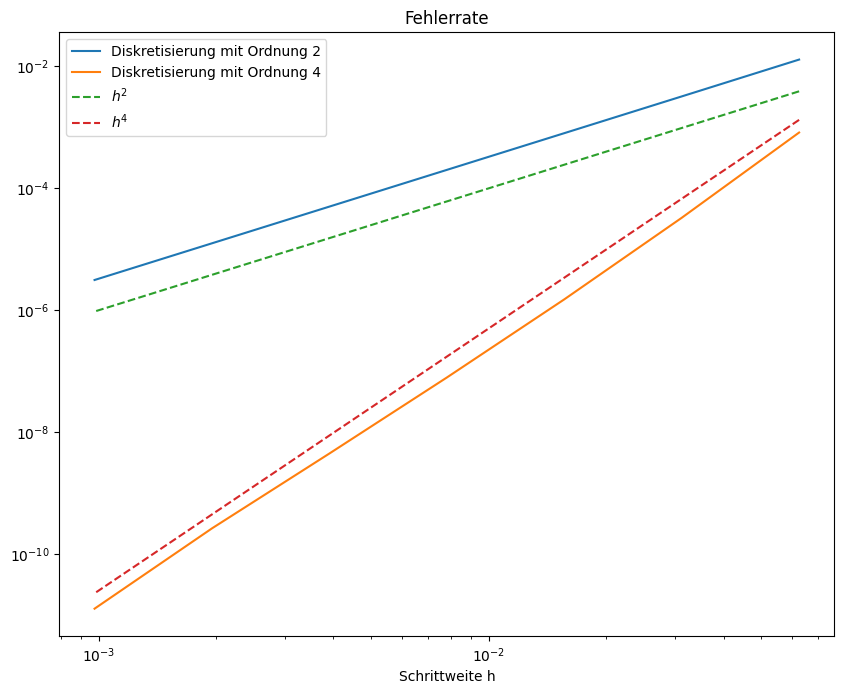

In [4]:
Narray = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10]
harray = np.divide(1,Narray)
err4 = np.array([])
err2 = np.array([])

for N in Narray:
    Z = N*N*Poissonmatrix(N-1)
    Z2 = Poissonmatrix4thorder(N-1)
    M = MassMatrix(N+1)
    b = -100*np.ones(N-1)
    b = 4*pi*pi*np.sin(2*pi*np.arange(1/N,1,1/N))
    #b = np.ones(N-1)
    #b[N//2:] = -1
    b2 = np.copy(b)

    ApplyDirichlet(b,bc0,bc1,N)
    ApplyDirichlet4thorder(b2,bc0,bc1,N)

    c = np.linalg.solve(Z,b)
    c2 = np.linalg.solve(Z2,b2)
    clong = np.hstack([bc0, c, bc1])
    clong2 = np.hstack([bc0, c2, bc1])

    #err2 = np.append(err2,1/(N+1)*np.linalg.norm(clong-np.sin(2*pi*np.arange(0,1+1/N,1/N))))
    #err4 = np.append(err4,1/(N+1)*np.linalg.norm(clong2-np.sin(2*pi*np.arange(0,1+1/N,1/N))))
    
    errvec2 = clong-np.sin(2*pi*np.arange(0,1+1/N,1/N))
    errvec4 = clong2-np.sin(2*pi*np.arange(0,1+1/N,1/N))
    
    locerr2 = np.sqrt(np.dot(errvec2,np.matmul(M,errvec2)))
    locerr4 = np.sqrt(np.dot(errvec2,np.matmul(M,errvec4)))
    
    err2 = np.append(err2,max(clong-np.sin(2*pi*np.arange(0,1+1/N,1/N))))
    err4 = np.append(err4,max(clong2-np.sin(2*pi*np.arange(0,1+1/N,1/N))))
    
    #err2 = np.append(err2,locerr2)
    #err4 = np.append(err4,locerr4)
    
fig2 = plt.figure(figsize=(10,8),dpi=100)
plt.loglog(harray,err2)
plt.loglog(harray,err4)
plt.loglog(harray,np.power(harray,2),'--')
plt.loglog(harray,200*np.power(harray,4.3),'--')
plt.title("Fehlerrate")
plt.xlabel("Schrittweite h")
plt.legend(["Diskretisierung mit Ordnung 2", "Diskretisierung mit Ordnung 4", "$h^2$", "$h^4$"])